In [3]:
import pandas as pd
import numpy as np
from cluster import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [32]:
filepath = 'diauxic_raw_ratios_RG.txt'
diauxic= pd.read_csv(filepath, sep='\t')
len(diauxic)
diauxic.head()

,ORF,Name,R1.Ratio,R2.Ratio,R3.Ratio,R4.Ratio,R5.Ratio,R6.Ratio,R7.Ratio
1,YHR007C,ERG11,1.123596,1.190476,1.315789,0.877193,0.840336,0.383142,0.434783
2,YAL065C,NaN,0.909091,0.653595,1.136364,0.970874,0.781250,1.123596,1.234568
3,YAR062W,NaN,0.751880,1.149425,1.098901,0.925926,0.628931,1.176471,1.351351
4,YDR006C,SOK1,1.111111,0.833333,0.458716,0.334448,0.348432,0.671141,0.546448
5,YDR007W,TRP1,1.041667,1.020408,1.052632,0.787402,0.980392,1.063830,0.952381


In [3]:
diauxic.head()
columns = list(diauxic.columns.values)
expressionColumns = columns[2:]
expressionVectors = list(diauxic[expressionColumns].values)
t = np.array([-6,-4,-2,0,2,4,6])

In [26]:
X = expressionVectors[:3000]
clusters = lloydsAlgorithm(X,6)

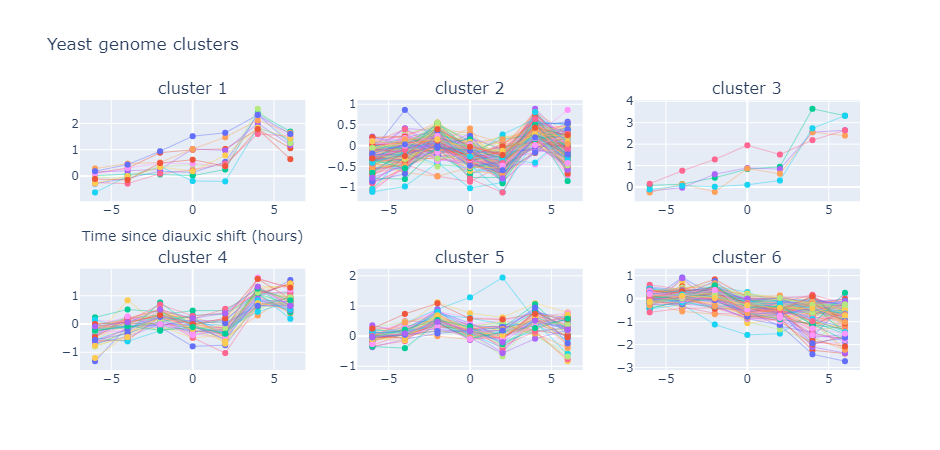

In [40]:
fig = make_subplots(rows=2, cols=3,subplot_titles=('cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6'))

for j in range(6):
    for i in range(len(clusters[j])):
        if j <=2:
            row =1
        else:
            row = 2
        
        fig.add_trace(go.Scatter(x=t,y=np.log2(clusters[j][i]),line=dict(width=0.45)),row=row, col = (j%3)+1)

    fig.update_layout(title='Yeast genome clusters')
    fig.update_layout(showlegend=False)
fig.show()

In [ ]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

VR = VietorisRipsPersistence(homology_dimensions=[0,1,2,3])  # Parameter explained in the text
diagrams = VR.fit_transform([(np.array(clusters[3]))])
plot_diagram(diagrams[0])

In [41]:
X = np.array(X)
diagrams.shape

(1, 529, 3)

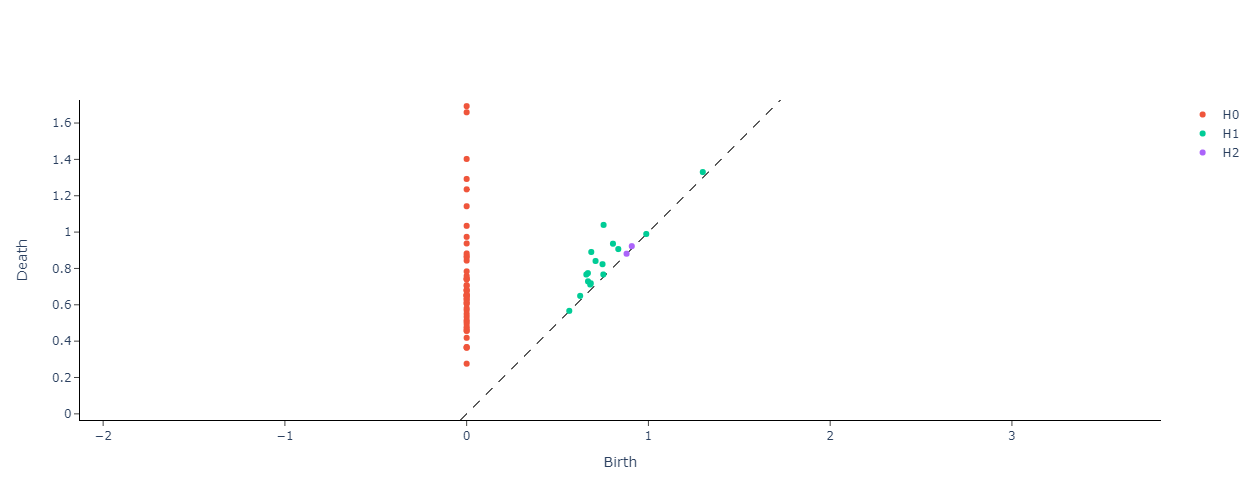

In [21]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2,3,4,5])  # Parameter explained in the text
diagrams = VR.fit_transform([np.log2(np.array(X[:50]))])
plot_diagram(diagrams[0])

In [12]:
c=[(3, 5), (5, 4)]


X = [[2, 8], [2, 5], [6, 9], [7, 5], [5, 2]]
distortion(X,c)

9.0

In [13]:
X = [(1, 3, -1), (9, 8, 14), (6, 2, 10), (4, 3, 1)]

centerOfGravity(X)

[5.0, 4.0, 6.0]